In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 5.9 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import contractions
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from wordcloud import WordCloud

In [4]:
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [5]:
file_path = '/content/drive/MyDrive/SMA/Reviews.csv'
df = pd.read_csv(file_path)

In [6]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [8]:
df.shape

(568454, 10)

In [9]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [10]:
df = df.head(100000)

In [11]:
df.dtypes

,0
Id,int64
ProductId,object
UserId,object
ProfileName,object
HelpfulnessNumerator,int64
HelpfulnessDenominator,int64
Score,int64
Time,int64
Summary,object
Text,object


<ipython-input-12-f7ed7e6608b2>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=review_counts, x='Score', y='Count', palette='Set2')


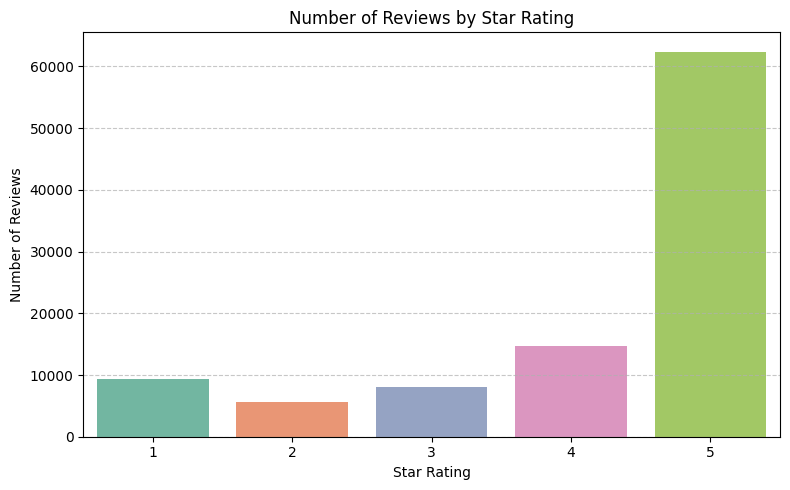

In [12]:
# Count reviews by star rating
review_counts = df['Score'].value_counts().sort_index().reset_index()
review_counts.columns = ['Score', 'Count']

# Plot using seaborn
plt.figure(figsize=(8, 5))
sns.barplot(data=review_counts, x='Score', y='Count', palette='Set2')
plt.title('Number of Reviews by Star Rating')
plt.xlabel('Star Rating')
plt.ylabel('Number of Reviews')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [13]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [14]:
print(df['Text'][0])

I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.


In [15]:
missing = df.isnull().sum()
print(missing)

Id                        0
ProductId                 0
UserId                    0
ProfileName               6
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   2
Text                      0
dtype: int64


In [16]:
df.isna().sum()

,0
Id,0
ProductId,0
UserId,0
ProfileName,6
HelpfulnessNumerator,0
HelpfulnessDenominator,0
Score,0
Time,0
Summary,2
Text,0


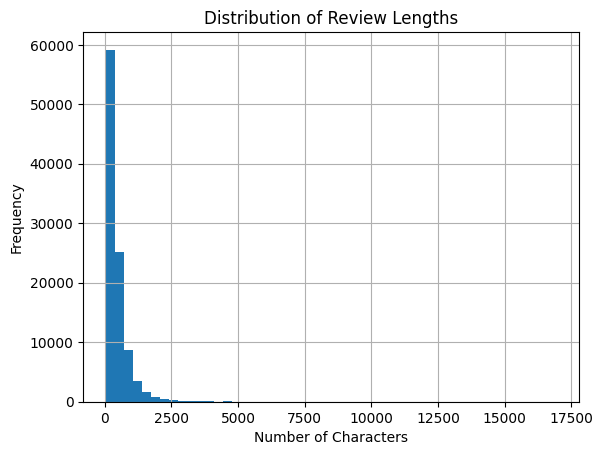

In [17]:
df['review_length'] = df['Text'].astype(str).apply(len)
df['review_length'].hist(bins=50)
plt.title('Distribution of Review Lengths')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.show()

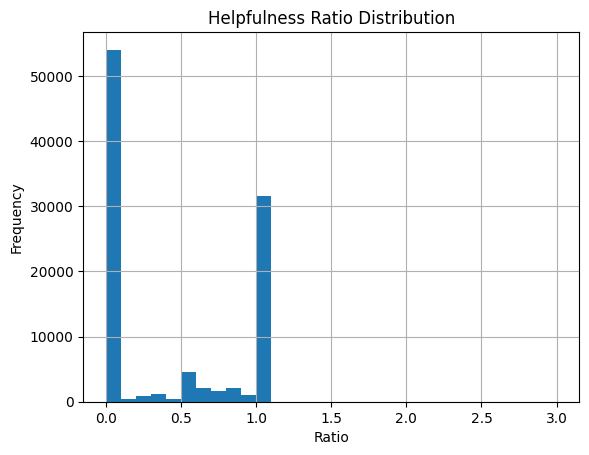

In [18]:
df['helpfulness_ratio'] = df['HelpfulnessNumerator'] / df['HelpfulnessDenominator']
df['helpfulness_ratio'] = df['helpfulness_ratio'].fillna(0)  # Handle division by zero

# Visualize helpfulness ratio
df['helpfulness_ratio'].hist(bins=30)
plt.title('Helpfulness Ratio Distribution')
plt.xlabel('Ratio')
plt.ylabel('Frequency')
plt.show()

UserId
AY12DBB0U420B     88
A3OXHLG6DIBRW8    79
A1TMAVN4CEM8U8    66
A281NPSIMI1C2R    64
A1YUL9PCJR3JTY    63
A1Z54EM24Y40LL    54
A3PJZ8TU8FDQ1K    50
A31N6KB160O508    38
A3HPCRD9RX351S    37
A2SZLNSI5KOQJT    36
Name: count, dtype: int64


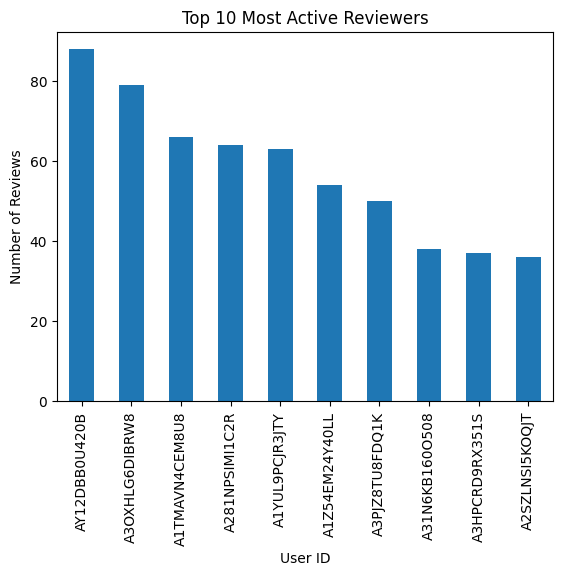

In [19]:
top_users = df['UserId'].value_counts().head(10)
print(top_users)
top_users.plot(kind='bar')
plt.title('Top 10 Most Active Reviewers')
plt.xlabel('User ID')
plt.ylabel('Number of Reviews')
plt.show()

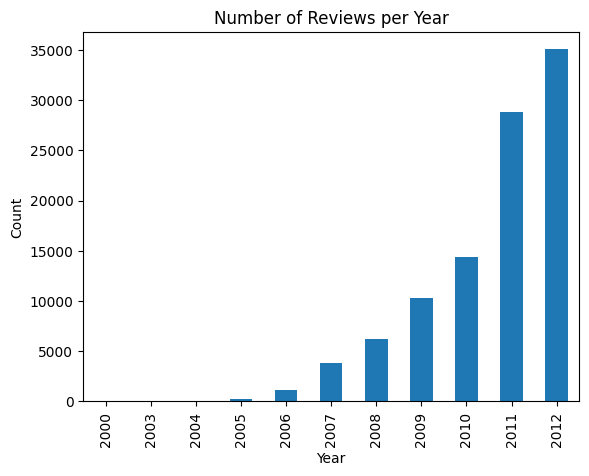

In [20]:
import datetime

df['date'] = pd.to_datetime(df['Time'], unit='s')
df['date'].dt.year.value_counts().sort_index().plot(kind='bar')
plt.title('Number of Reviews per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

In [21]:
df['Score'].value_counts()

,count
Score,
5,62412
4,14643
1,9318
3,8059
2,5568


In [22]:
df['Text'] = df['Text'].str.lower()

In [23]:
url_pattern = r'http[s]?://[^\s]+'
urls_found = df[df['Text'].str.contains(url_pattern, regex=True)]

print("Sentences with URLs:")
print(urls_found[['Text']])

Sentences with URLs:
                                                    Text
21     i bought these for my husband who is currently...
25     product received is as advertised.<br /><br />...
39     i ordered this for my wife as it was reccomend...
348    "these are delicious! the chocolate is excelle...
369    green mountain "nantucket blend" k-cups make a...
...                                                  ...
99764  ok, what's not to love about a meal you can ma...
99766  first, since the photo is hard to see and the ...
99786  <a href="http://www.amazon.com/gp/product/b000...
99800  this is a very smooth coffee.  i do prefer a s...
99958  i first picked up <a href="http://www.amazon.c...

[2101 rows x 1 columns]


In [24]:
df['Text'] = df['Text'].str.replace(url_pattern, '', regex=True)
df['Text'] = df['Text'].str.strip()

In [25]:
url_pattern = r'http[s]?://[^\s]+'
urls_found = df[df['Text'].str.contains(url_pattern, regex=True)]

print("Sentences with URLs:")
print(urls_found[['Text']])

Sentences with URLs:
Empty DataFrame
Columns: [Text]
Index: []


In [26]:
email_pattern = r'[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}'
emails_found = df[df['Text'].str.contains(email_pattern, regex=True)]

print("\nSentences with email addresses:")
print(emails_found[['Text']])


Sentences with email addresses:
                                                    Text
19443  my boyfriend just got fired from his job b/c h...
30499  i have had many dogs and cats throughout my ad...
32062  you sent the wrong coffee!you did alright with...
36421  i ordered these and got them quickly. was exci...
38543  where is my package ordered november 10th and ...
39368  been looking for the value of an unopened box ...
42207  i have been a good customer of yours for above...
48759  these snack bites (beef) are the best and gett...
52381  i have been a good customer of yours for above...
52485  dear amazon.com<br /><br />i am pleased to inf...
61883  i purchased a three gal water bottle thru amaz...
64595  this wild rice blend, single bags, is very har...
75613  hello, this is frank and i am the owner, opera...
79660  i have been a good customer of yours for above...
82639  i have visited the olive oil symposium in flor...
84344  i ordered this plant and i can't even beleive ..

In [27]:
hashtag_pattern = r'#[\w]+'
hashtags_found = df[df['Text'].str.contains(hashtag_pattern, regex=True)]

print("\nSentences with hashtags:")
print(hashtags_found[['Text']])


Sentences with hashtags:
                                                    Text
173    i couldn't wait to try the 8&#8243; cinnamon c...
1130   nice combination of ingredients so that it is ...
1460   <span class="tiny"> length:: 1:38 mins<br /><b...
1493   i have purchased locally many other flavors of...
1641   i bought these and tried each flavor. i could ...
...                                                  ...
98404  wow, i just had my first larabar today after a...
98425  (note: i purchased this box on july 8, 2012 --...
98495  i love larabars - all flavors. this one isn't ...
99934  review:<br />i've eaten ramen for a long time ...
99938  i really appreciate amazon for carrying this p...

[247 rows x 1 columns]


In [28]:
df['Text'] = df['Text'].str.replace(hashtag_pattern, '', regex=True)
df['Text'] = df['Text'].str.strip()

In [29]:
df['Text'] = df['Text'].str.strip().str.replace('\s+', ' ', regex=True)

In [30]:
df['Text'] = df['Text'].apply(contractions.fix)

In [31]:
def remove_special_characters(text):
    return re.sub(r'[^A-Za-z0-9\s]', '', text)

df['Text'] = df['Text'].apply(remove_special_characters)

In [32]:
def remove_numbers(text):
    return re.sub(r'\d+', '', text)

df['Text'] = df['Text'].apply(remove_numbers)

In [33]:
df['Text'] = df['Text'].str.strip().str.replace('\s+', ' ', regex=True)

In [34]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [35]:
def preprocess(text):
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    pos_tags = pos_tag(filtered_tokens)
    #ps = PorterStemmer()
    #stemmed_tokens = [ps.stem(word) for word in filtered_tokens]
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in pos_tags]
    return ' '.join(lemmatized_tokens)

In [36]:
df['Text'] = df['Text'].apply(preprocess)

In [37]:
df['Text']

,Text
0,buy several vitality can dog food product find...
1,product arrive labeled jumbo salt peanutsthe p...
2,confection around century light pillowy citrus...
3,look secret ingredient robitussin believe find...
4,great taffy great price wide assortment yummy ...
...,...
99995,love buy another box do last one
99996,late father law use rating system meal particu...
99997,favorite brand korean ramen spicy use eating s...
99998,like noodle although say spicy somewhat unders...


In [38]:
text_corpus = " ".join(df['Text'].dropna().astype(str).tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_corpus)

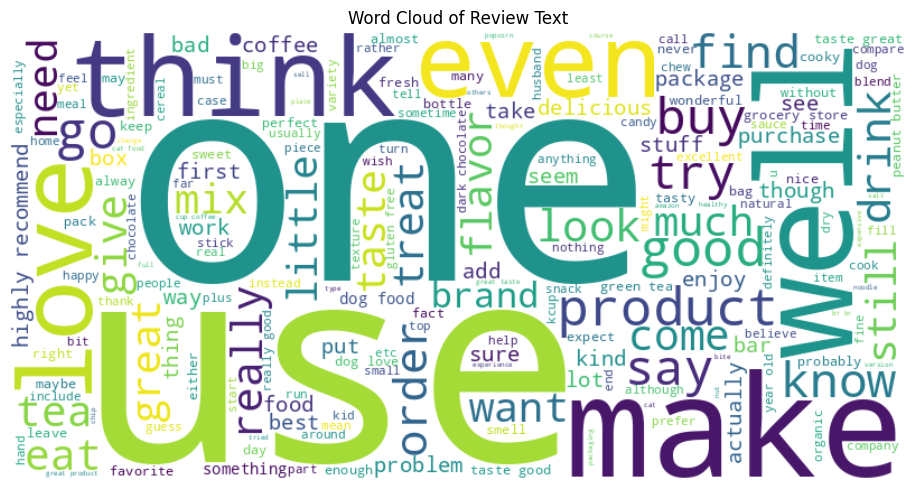

In [39]:
# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Review Text")
plt.tight_layout()
plt.show()

In [40]:
!pip install vaderSentiment

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.9 MB/s eta 0:00:00


In [41]:
def get_vader_scores(text):
    scores = analyzer.polarity_scores(str(text))
    return pd.Series([scores['neg'], scores['neu'], scores['pos'], scores['compound']])

df[['vader_neg', 'vader_neu', 'vader_pos', 'vader_compound']] = df['Text'].apply(get_vader_scores)

def classify_sentiment(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['vader_sentiment'] = df['vader_compound'].apply(classify_sentiment)

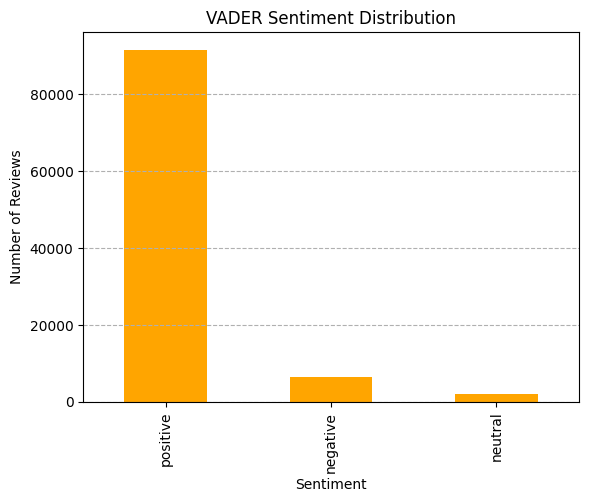

In [42]:
df['vader_sentiment'].value_counts().plot(kind='bar', color='orange')
plt.title('VADER Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.grid(axis='y', linestyle='--')
plt.show()

In [43]:
plt.style.use('ggplot')

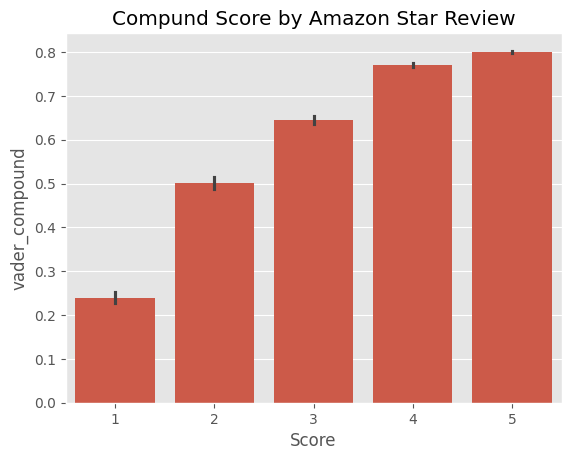

In [44]:
ax = sns.barplot(data=df, x='Score', y='vader_compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

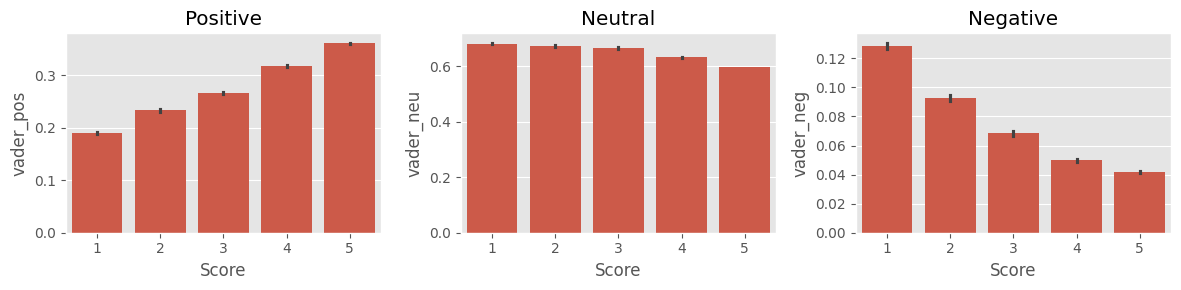

In [45]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=df, x='Score', y='vader_pos', ax=axs[0])
sns.barplot(data=df, x='Score', y='vader_neu', ax=axs[1])
sns.barplot(data=df, x='Score', y='vader_neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [46]:
positive_threshold = 0.6   # High compound score
low_rating_threshold = 2   # 1 or 2 stars


sarcastic_candidates = df[(df['vader_compound'] >= positive_threshold) & (df['Score'] <= low_rating_threshold)]


sarcastic_candidates[['Score', 'vader_compound', 'Text']].head(10)

,Score,vader_compound,Text
16,2,0.9313,love eat good watch tv look movie sweet like t...
50,1,0.6597,oatmeal good mushy soft like quaker oat way go
73,1,0.9729,buyer beware please sweetener everybody maltit...
146,2,0.8689,salsa smell delicious think probably unfortuna...
153,1,0.8957,single sell store box single sure amazon sell ...
164,1,0.7506,seriously product tasteless come much well tas...
208,1,0.9045,nothing like regular altoids breath mint pleas...
254,1,0.7096,felt energize within five minute last minute p...
255,2,0.9698,yes probably healthier hour energy starbucks s...
258,2,0.8807,product strong aftertaste crayola crayonsbr br...


In [47]:
def map_rating(score):
    if score <= 2:
        return -1
    elif score == 3:
        return 0
    else:
        return 1

df['rating_sentiment'] = df['Score'].apply(map_rating)

In [48]:
df[['summary_neg', 'summary_neu', 'summary_pos', 'summary_compound']] = df['Summary'].apply(
    lambda x: pd.Series(analyzer.polarity_scores(str(x)))
)

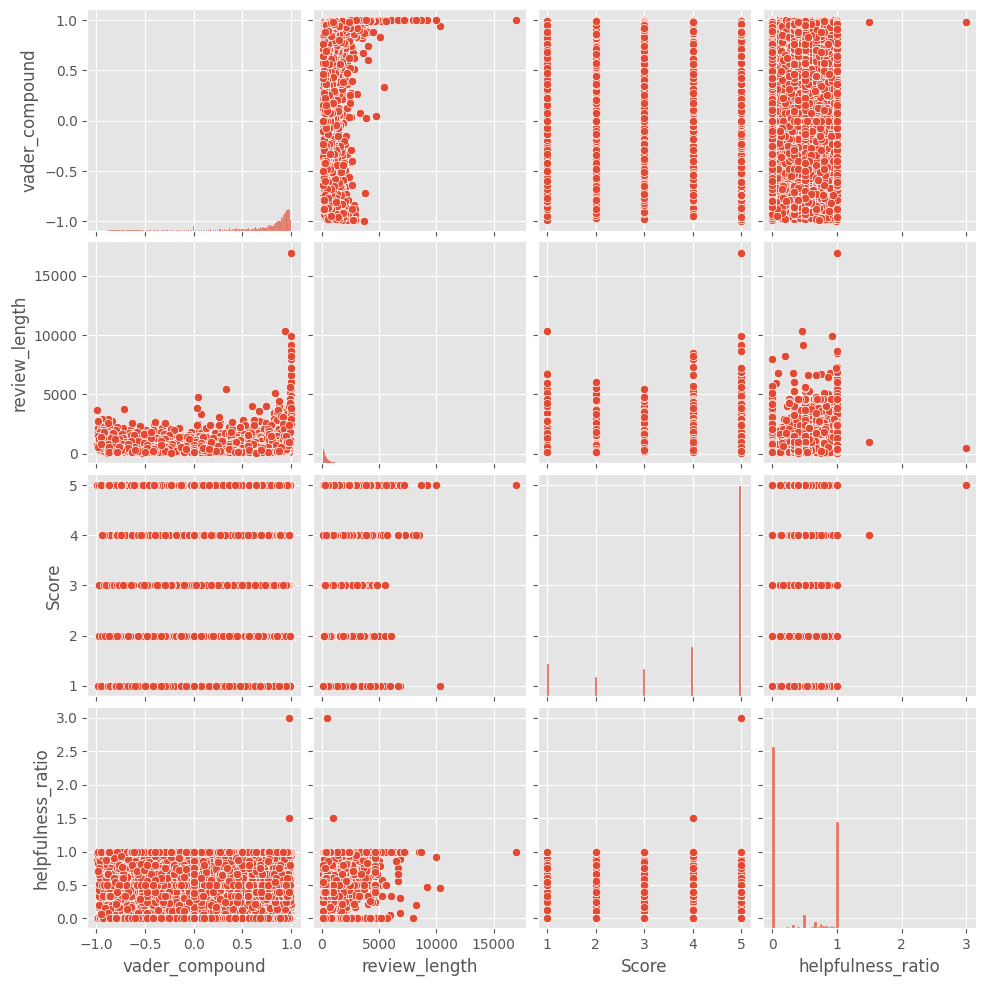

In [49]:
features = ['vader_compound', 'review_length', 'Score']
sns.pairplot(df[features + ['helpfulness_ratio']])
plt.show()

In [50]:
df[features + ['helpfulness_ratio']].corr()

,vader_compound,review_length,Score,helpfulness_ratio
vader_compound,1.000000,0.164045,0.424684,0.016580
review_length,0.164045,1.000000,-0.088126,0.115477
Score,0.424684,-0.088126,1.000000,0.028932
helpfulness_ratio,0.016580,0.115477,0.028932,1.000000


In [51]:
def map_rating(score):
    if score <= 2:
        return 'negative'
    elif score == 3:
        return 'neutral'
    else:
        return 'positive'

df['true_sentiment'] = df['Score'].apply(map_rating)

In [52]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(df['true_sentiment'], df['vader_sentiment']))


              precision    recall  f1-score   support

    negative       0.59      0.26      0.36     14886
     neutral       0.11      0.03      0.04      8059
    positive       0.81      0.96      0.88     77055

    accuracy                           0.78    100000
   macro avg       0.51      0.42      0.43    100000
weighted avg       0.72      0.78      0.73    100000



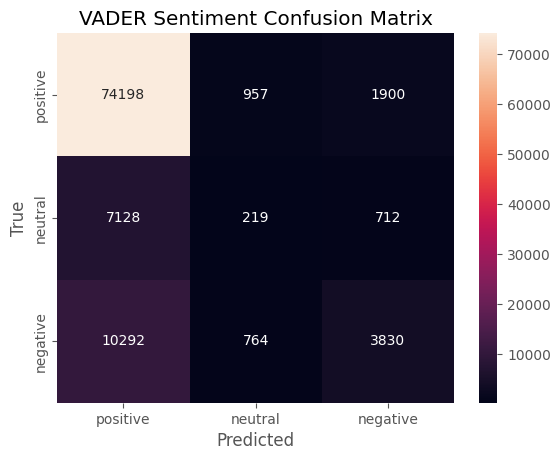

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(df['true_sentiment'], df['vader_sentiment'], labels=['positive', 'neutral', 'negative'])
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['positive', 'neutral', 'negative'], yticklabels=['positive', 'neutral', 'negative'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('VADER Sentiment Confusion Matrix')
plt.show()